# PCA/Factor & Regression

#### Project Objective:

Multicollinearity occurs when the independent variables of a regression model are correlated and if the degree of collinearity between the independent variables are high, it becomes difficult to estimate the relationship between each independent variable and the dependent variable and the overall precision of the estimate coefficients. Even though the regression models with high multicollinearity can give you a high R squared but hardly any significant variables.
The objective of the project is to use the dataset Factor-Hair-Revised.csv to build a regression model to predict satisfaction.


In [1]:
# Loading Packages --------------------------------------------------------

pacman::p_load(tidyverse, 
               esquisse,
               qgraph,
               MVN,
               forecast,
               formattable,
               MLmetrics,
               corrplot,
               moments,
               psych,
               car,
               nFactors,
               GPArotation,
               ppcor,
               DataExplorer,
               broom,
               ggfortify,
               factoextra
)

In [2]:
# Load Data in R ----------------------------------------------------------
O_Data <- read.csv("../input/hair-customer-survey-data-for-100-customers/Factor-Hair-Revised.csv",header = TRUE)
Data <- O_Data[,-1]
head(Data)
summary(Data)

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,8.5,3.9,2.5,5.9,4.8,4.9,6.0,6.8,4.7,5.0,3.7,8.2
2,8.2,2.7,5.1,7.2,3.4,7.9,3.1,5.3,5.5,3.9,4.9,5.7
3,9.2,3.4,5.6,5.6,5.4,7.4,5.8,4.5,6.2,5.4,4.5,8.9
4,6.4,3.3,7.0,3.7,4.7,4.7,4.5,8.8,7.0,4.3,3.0,4.8
5,9.0,3.4,5.2,4.6,2.2,6.0,4.5,6.8,6.1,4.5,3.5,7.1
6,6.5,2.8,3.1,4.1,4.0,4.3,3.7,8.5,5.1,3.6,3.3,4.7


    ProdQual           Ecom          TechSup         CompRes     
 Min.   : 5.000   Min.   :2.200   Min.   :1.300   Min.   :2.600  
 1st Qu.: 6.575   1st Qu.:3.275   1st Qu.:4.250   1st Qu.:4.600  
 Median : 8.000   Median :3.600   Median :5.400   Median :5.450  
 Mean   : 7.810   Mean   :3.672   Mean   :5.365   Mean   :5.442  
 3rd Qu.: 9.100   3rd Qu.:3.925   3rd Qu.:6.625   3rd Qu.:6.325  
 Max.   :10.000   Max.   :5.700   Max.   :8.500   Max.   :7.800  
  Advertising       ProdLine      SalesFImage      ComPricing   
 Min.   :1.900   Min.   :2.300   Min.   :2.900   Min.   :3.700  
 1st Qu.:3.175   1st Qu.:4.700   1st Qu.:4.500   1st Qu.:5.875  
 Median :4.000   Median :5.750   Median :4.900   Median :7.100  
 Mean   :4.010   Mean   :5.805   Mean   :5.123   Mean   :6.974  
 3rd Qu.:4.800   3rd Qu.:6.800   3rd Qu.:5.800   3rd Qu.:8.400  
 Max.   :6.500   Max.   :8.400   Max.   :8.200   Max.   :9.900  
   WartyClaim      OrdBilling       DelSpeed      Satisfaction  
 Min.   :4.100   M

The data contains 12 variables used for Market Segmentation in the context of Product Service Management, we have to optimize the data, reducing the dimensionality of data and find out which aspect is the most important variable to the customer defining there satisfaction towards the product and services provided


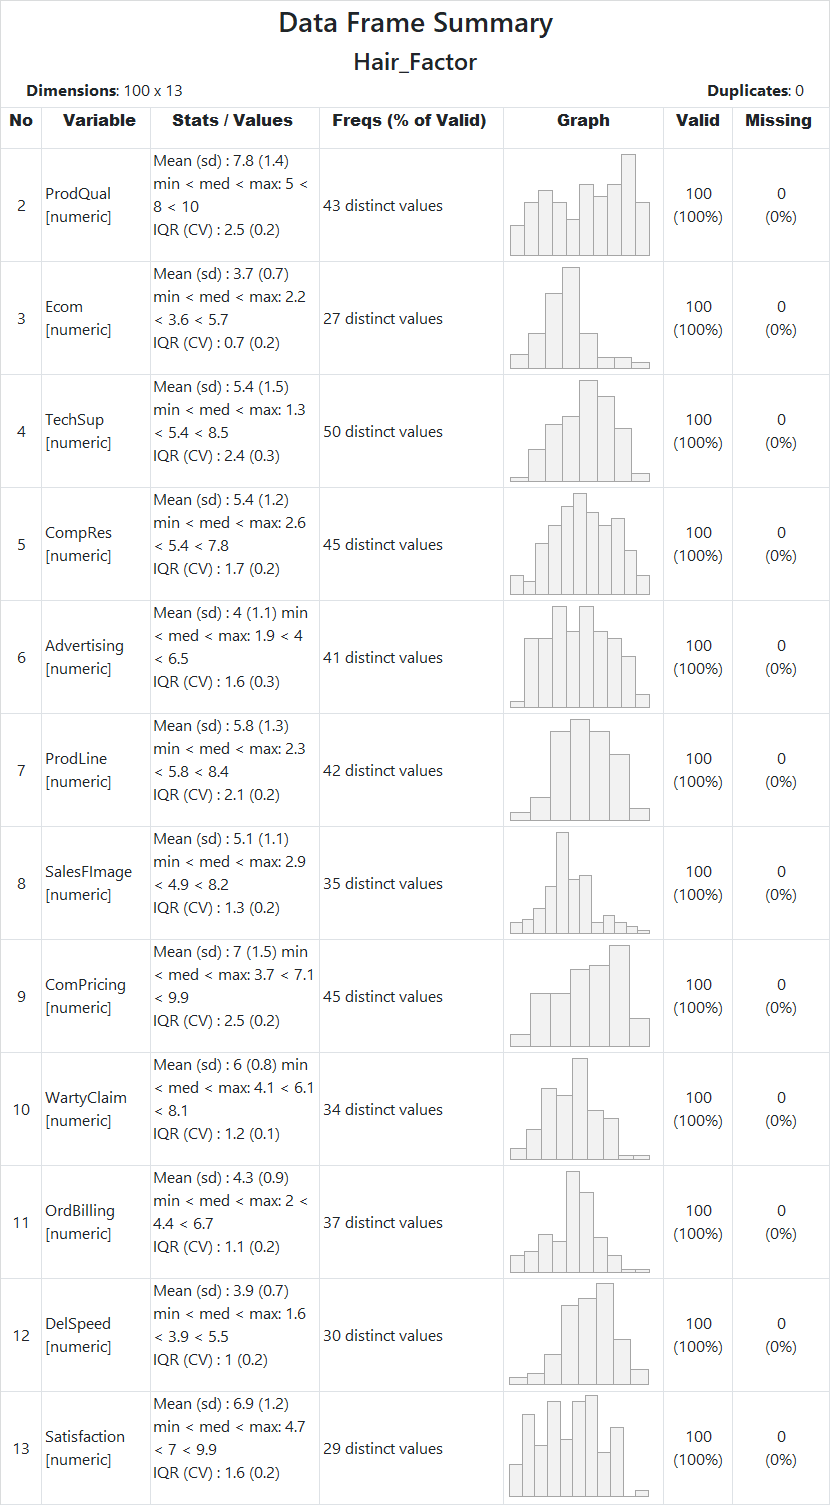

There are no missing values in the datasets

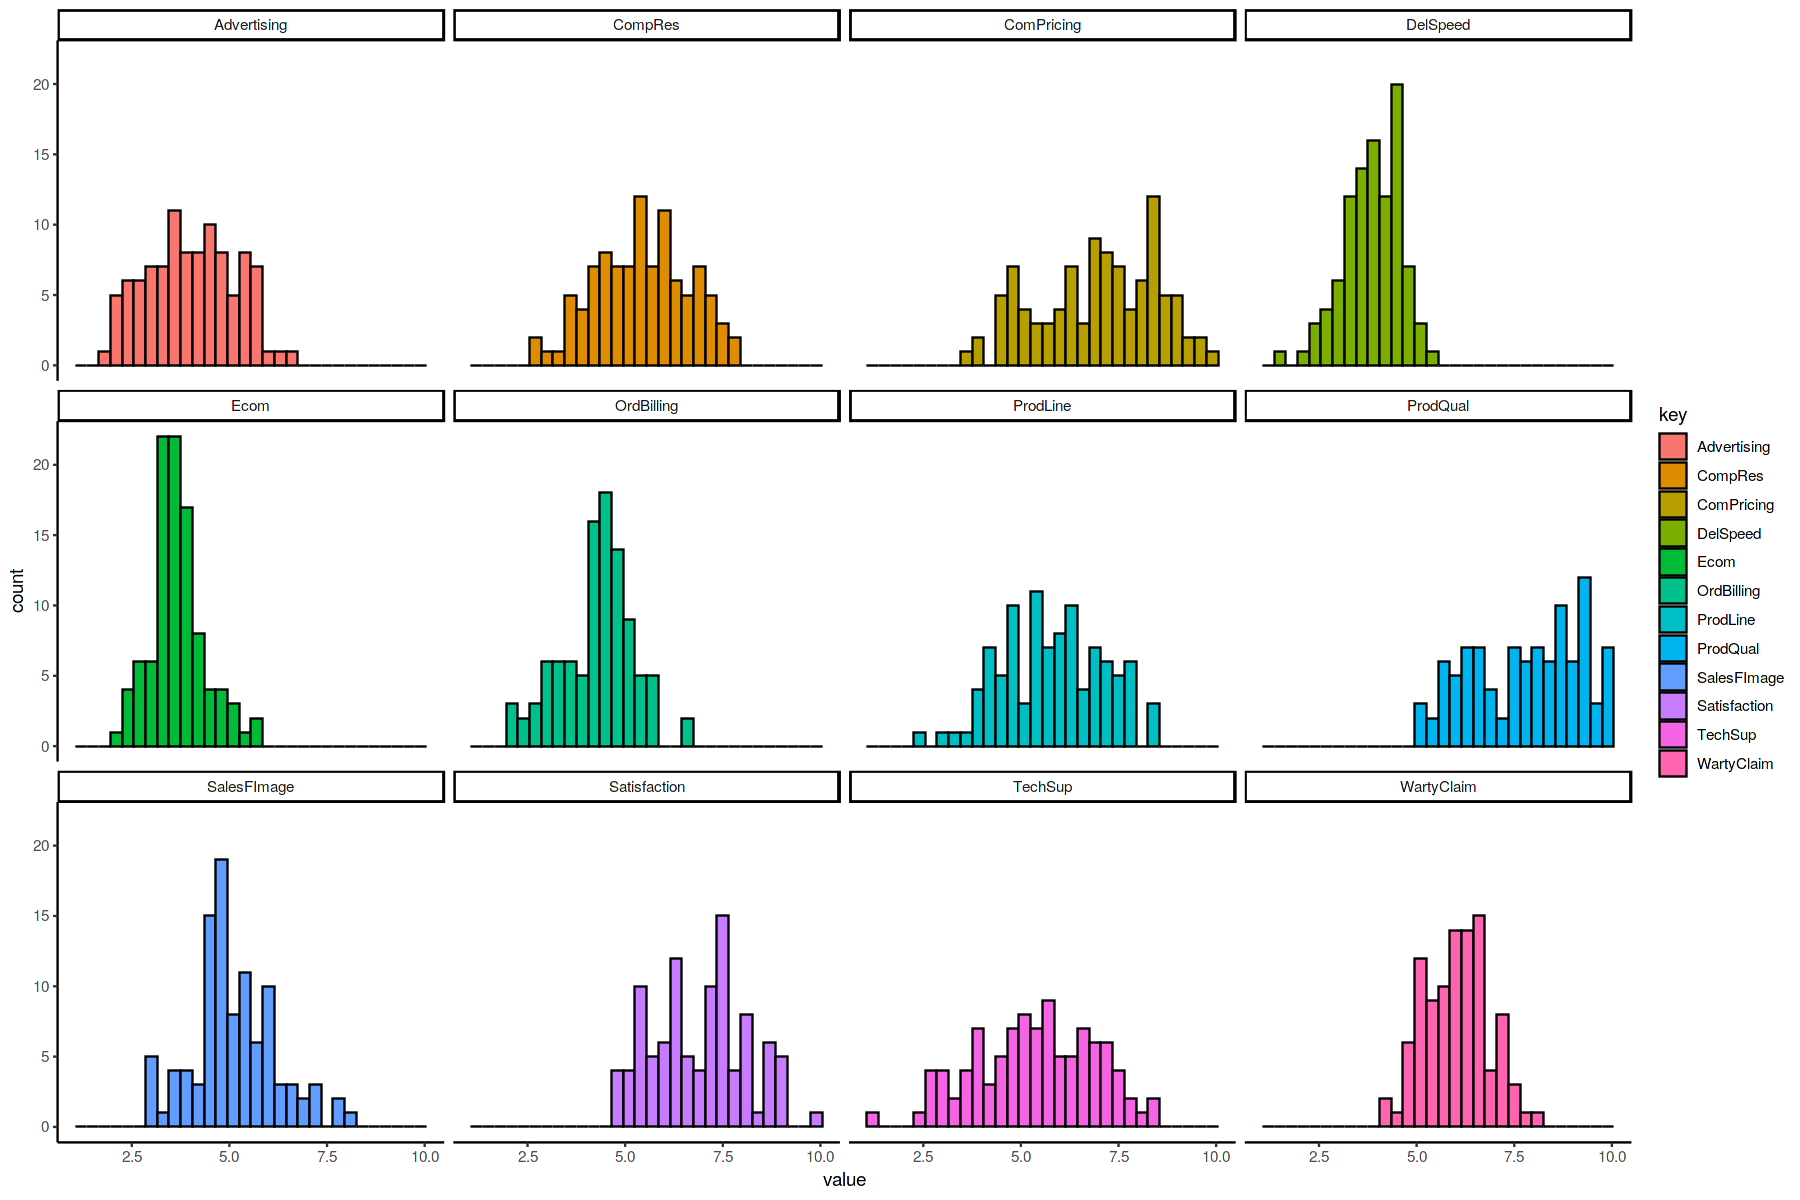

In [3]:
# Histogram ----------------------------------------------------------
options(repr.plot.width = 15, repr.plot.height = 10)
ggplot(gather(Data), aes(value,fill=key)) + 
    geom_histogram(colour = "black",bins = '30') + 
    facet_wrap(~key)+
  theme_classic()


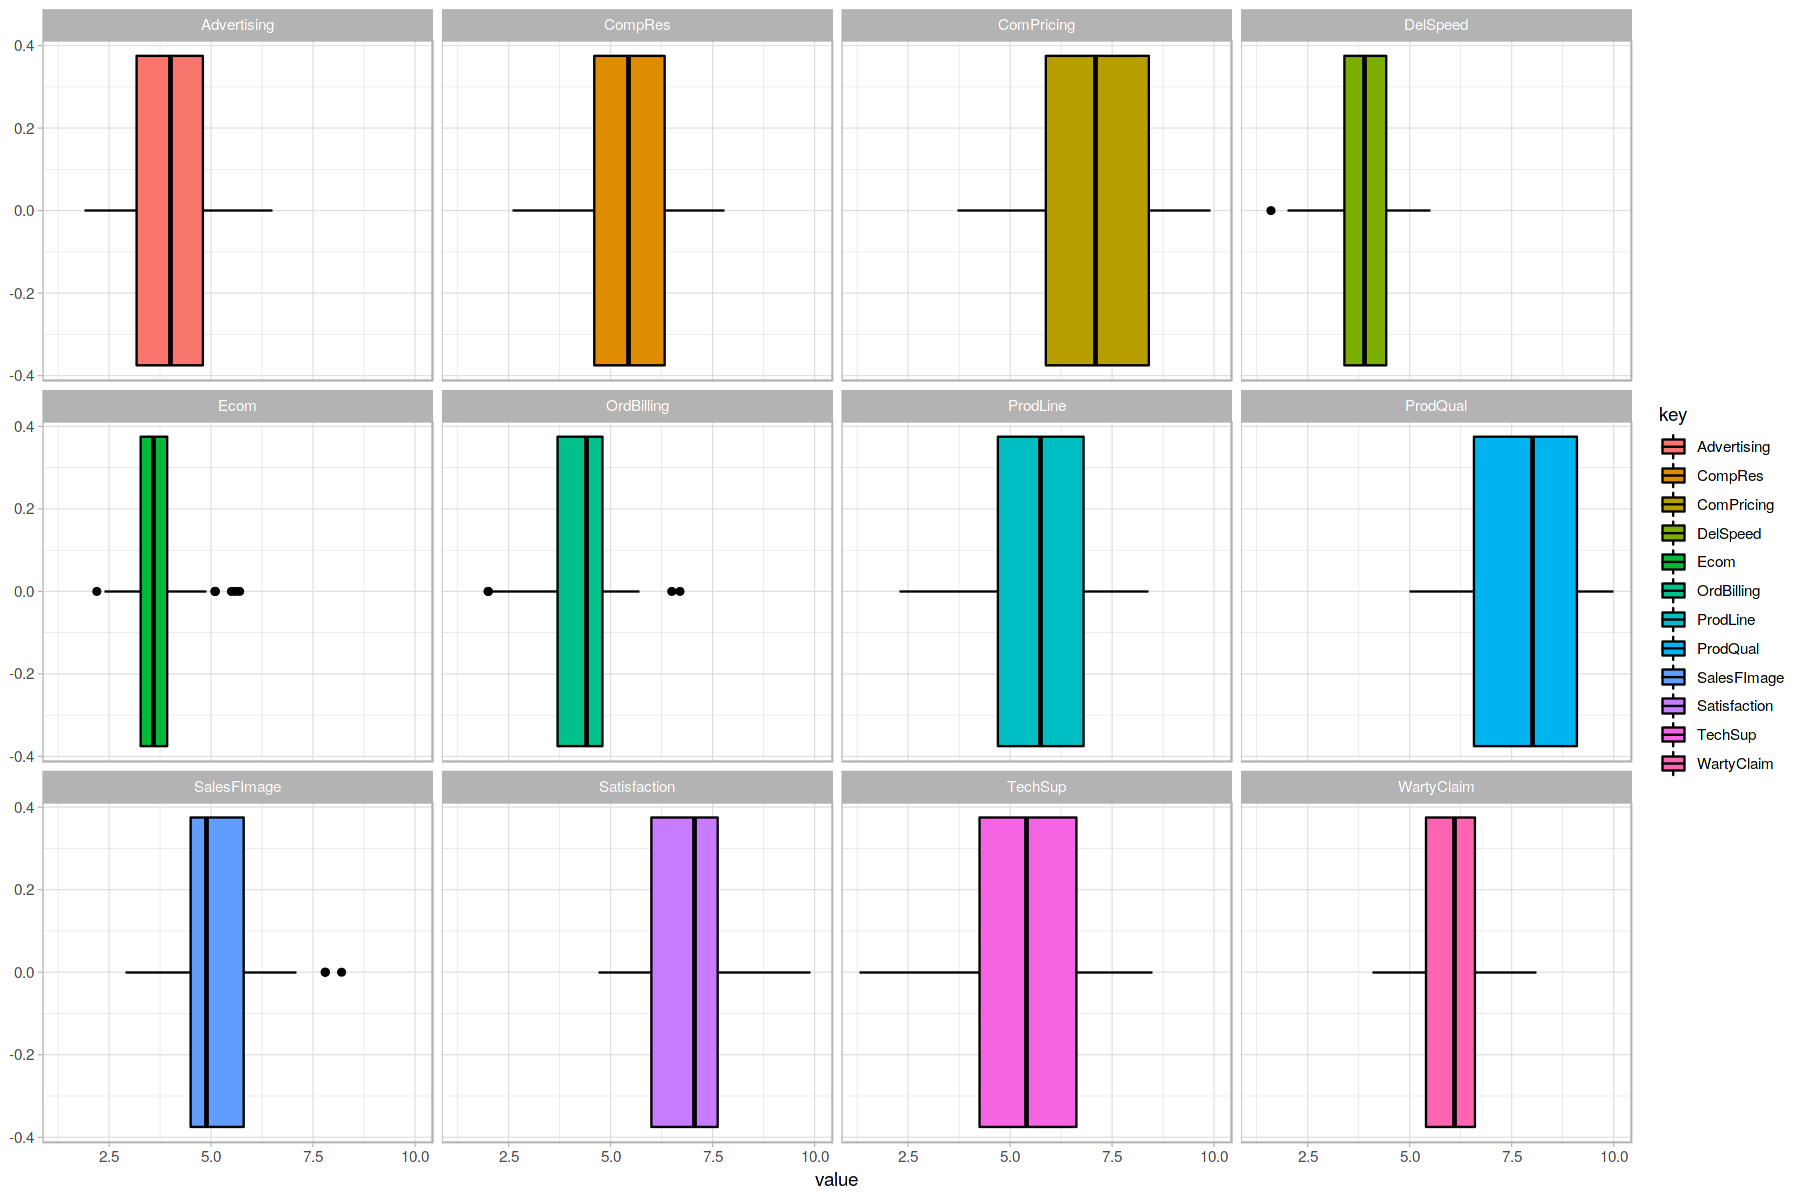

In [4]:
# Boxplot ----------------------------------------------------------
options(repr.plot.width = 15, repr.plot.height = 10)
ggplot(gather(Data), aes(value,fill=key)) + 
    geom_boxplot(colour = "black") + 
    facet_wrap(~key)+
  theme_light()

In [5]:
# Normality ----------------------------------------------------------
MVN::mvn(Data)

$multivariateNormality
             Test          Statistic              p value Result
1 Mardia Skewness   461.820997074465 0.000378691957477588     NO
2 Mardia Kurtosis -0.391324848847968    0.695557133670696    YES
3             MVN               <NA>                 <NA>     NO

$univariateNormality
           Test     Variable Statistic   p value Normality
1  Shapiro-Wilk   ProdQual      0.9497    0.0008    NO    
2  Shapiro-Wilk     Ecom        0.9585    0.0032    NO    
3  Shapiro-Wilk   TechSup       0.9863    0.3900    YES   
4  Shapiro-Wilk   CompRes       0.9865    0.4023    YES   
5  Shapiro-Wilk Advertising     0.9763    0.0677    YES   
6  Shapiro-Wilk   ProdLine      0.9869    0.4324    YES   
7  Shapiro-Wilk SalesFImage     0.9740    0.0453    NO    
8  Shapiro-Wilk  ComPricing     0.9676    0.0145    NO    
9  Shapiro-Wilk  WartyClaim     0.9909    0.7404    YES   
10 Shapiro-Wilk  OrdBilling     0.9741    0.0455    NO    
11 Shapiro-Wilk   DelSpeed      0.9816    0.1770    YES   
12 Shapiro-Wilk Satisfaction    0.9752    0.0556    YES   

$Descriptives
               n  Mean   Std.Dev Median Min  Max  25th  75th         Skew
ProdQual     100 7.810 1.3962793   8.00 5.0 10.0 6.575 9.100 -0.237215714
Ecom         100 3.672 0.7005164   3.60 2.2  5.7 3.275 3.925  0.640710684
TechSup      100 5.365 1.5304568   5.40 1.3  8.5 4.250 6.625 -0.197201529
CompRes      100 5.442 1.2084032   5.45 2.6  7.8 4.600 6.325 -0.131763526
Advertising  100 4.010 1.1269428   4.00 1.9  6.5 3.175 4.800  0.042299656
ProdLine     100 5.805 1.3152850   5.75 2.3  8.4 4.700 6.800 -0.089689444
SalesFImage  100 5.123 1.0723198   4.90 2.9  8.2 4.500 5.800  0.365660982
ComPricing   100 6.974 1.5450553   7.10 3.7  9.9 5.875 8.400 -0.232782461
WartyClaim   100 6.043 0.8197382   6.10 4.1  8.1 5.400 6.600  0.008120531
OrdBilling   100 4.278 0.9288398   4.40 2.0  6.7 3.700 4.800 -0.323600855
DelSpeed     100 3.886 0.7344372   3.90 1.6  5.5 3.400 4.425 -0.449292744
Satisfaction 100 6.918 1.1918393   7.05 4.7  9.9 6.000 7.625  0.075851399
                Kurtosis
ProdQual     -1.17254306
Ecom          0.56725507
TechSup      -0.62874790
CompRes      -0.66382028
Advertising  -0.94496992
ProdLine     -0.60412408
SalesFImage   0.26364425
ComPricing   -0.95972556
WartyClaim   -0.53227071
OrdBilling    0.10956856
DelSpeed      0.08532059
Satisfaction -0.85524249

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
ProdQual,1.00000000,-0.1371632174,0.0956004542,0.1063700,-0.05347313,0.47749341,-0.15181287,-0.40128188,0.08831231,0.10430307,0.02771800,0.4863250
Ecom,-0.13716322,1.0000000000,0.0008667887,0.1401793,0.42989071,-0.05268784,0.79154371,0.22946240,0.05189819,0.15614733,0.19163607,0.2827450
TechSup,0.09560045,0.0008667887,1.0000000000,0.0966566,-0.06287007,0.19262546,0.01699054,-0.27078668,0.79716793,0.08010182,0.02544069,0.1125972
CompRes,0.10637000,0.1401792611,0.0966565978,1.0000000,0.19691685,0.56141695,0.22975176,-0.12795425,0.14040830,0.75686859,0.86509170,0.6032626
Advertising,-0.05347313,0.4298907110,-0.0628700668,0.1969168,1.00000000,-0.01155082,0.54220366,0.13421689,0.01079207,0.18423559,0.27586308,0.3046695
ProdLine,0.47749341,-0.0526878383,0.1926254565,0.5614170,-0.01155082,1.00000000,-0.06131553,-0.49494840,0.27307753,0.42440825,0.60185021,0.5505459
SalesFImage,-0.15181287,0.7915437115,0.0169905395,0.2297518,0.54220366,-0.06131553,1.00000000,0.26459655,0.10745534,0.19512741,0.27155126,0.5002053
ComPricing,-0.40128188,0.2294624014,-0.2707866821,-0.1279543,0.13421689,-0.49494840,0.26459655,1.00000000,-0.24498605,-0.11456703,-0.07287173,-0.2082957
WartyClaim,0.08831231,0.0518981915,0.7971679258,0.1404083,0.01079207,0.27307753,0.10745534,-0.24498605,1.00000000,0.19706512,0.10939460,0.1775448
OrdBilling,0.10430307,0.1561473316,0.0801018246,0.7568686,0.18423559,0.42440825,0.19512741,-0.11456703,0.19706512,1.00000000,0.75100307,0.5217319


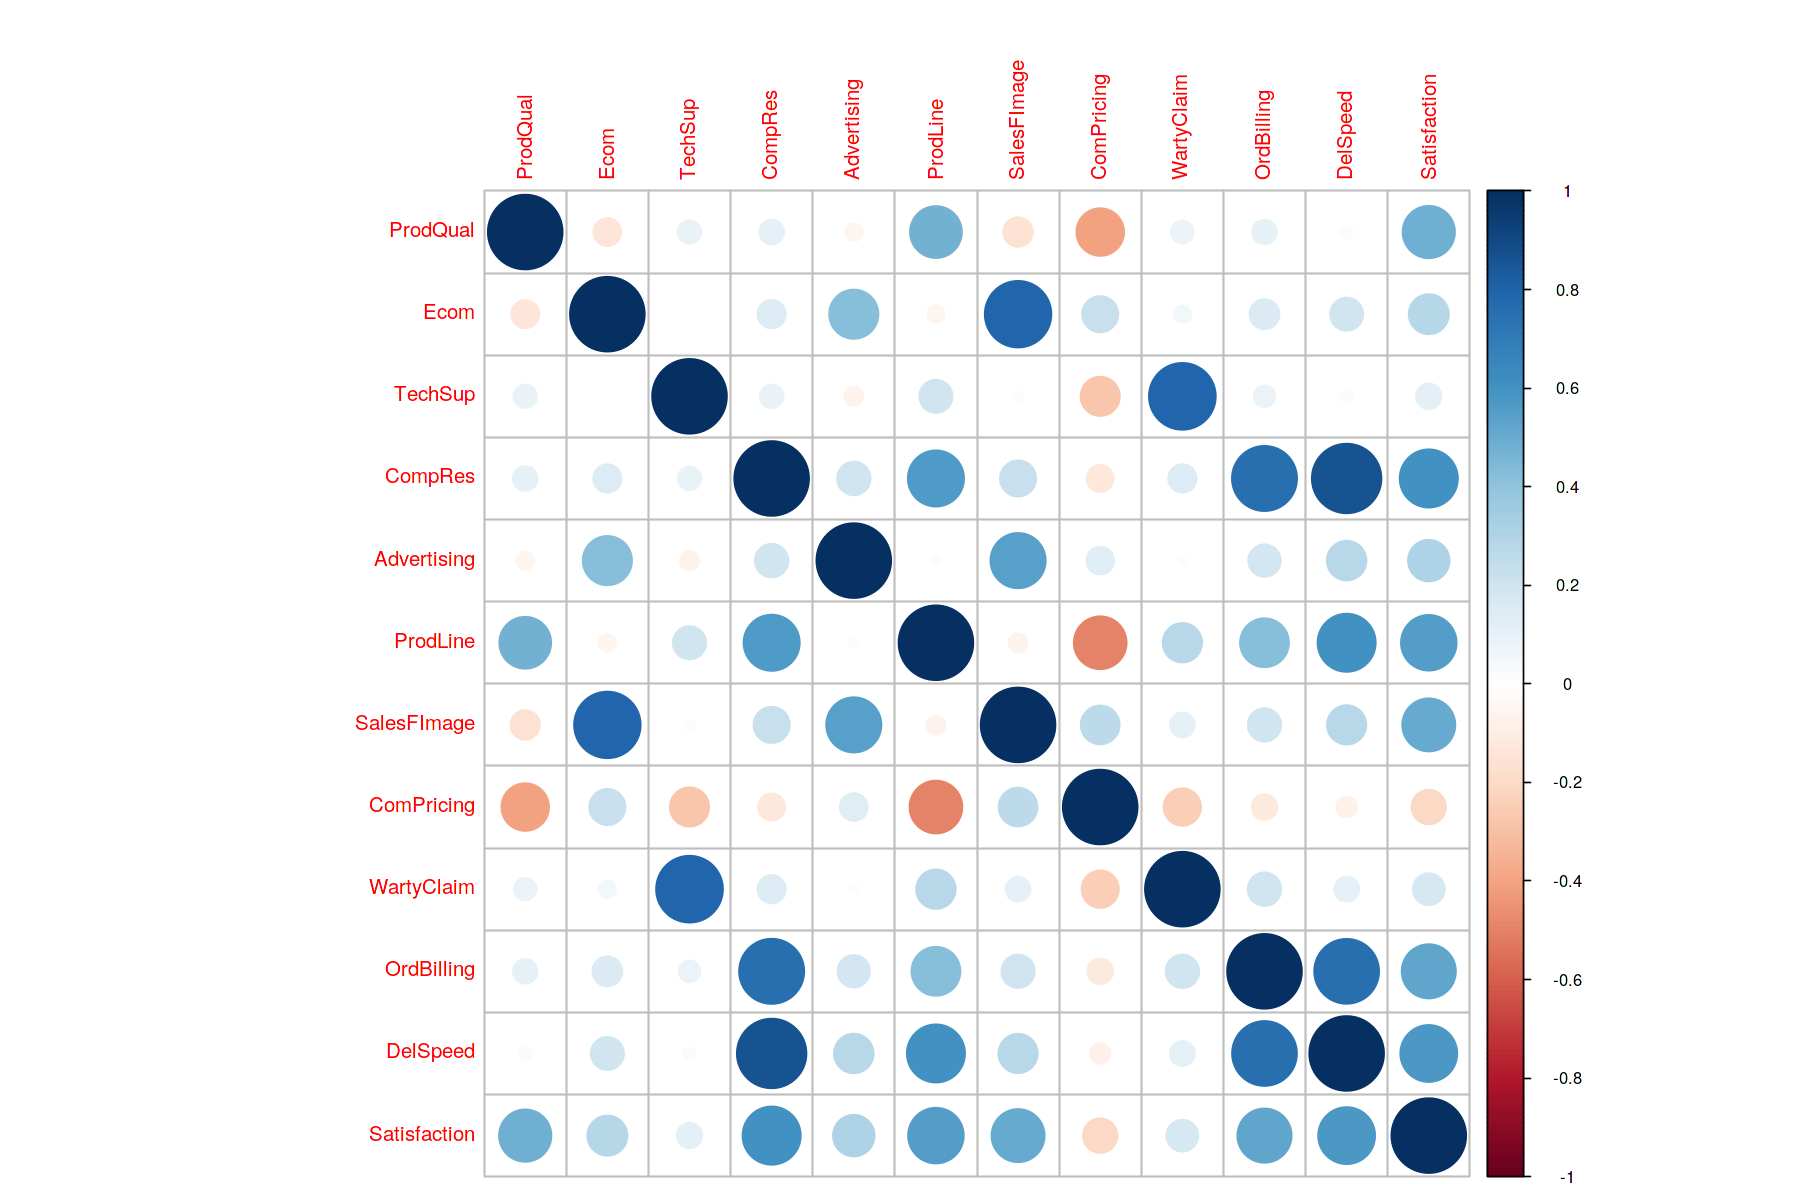

In [6]:

#Correlation ----------------------------------------------------------
correl=cor(Data, method = "pearson")
formattable::percent(Correlation <- cor(Data))

corrplot(Correlation, method = "circle")

#### Key Observation
*  From the boxplot we can conclude that Sales Force Image, E-commerce, Order billing, Delivery Speed have outliers.
*  Product Quality rating have high variation in data distribution followed by Tech support and Competitive pricing.
*  Product Quality has higher average value than other factors.
*  CompRes and DelSpeed are highly correlated
*  OrdBilling and CompRes are highly correlated
*  WartyClaim and TechSupport are highly correlated
*  CompRes and OrdBilling are highly correlated
*  OrdBilling and DelSpeed are highly correlated
*  Ecom and SalesFImage are highly correlated

In [7]:

#Regression and Evidence for Multicollinearity--------------------------
model0 = lm(Satisfaction~., Data)
summary(model0)
vif(model0)


Call:
lm(formula = Satisfaction ~ ., data = Data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.43005 -0.31165  0.07621  0.37190  0.90120 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.66961    0.81233  -0.824  0.41199    
ProdQual     0.37137    0.05177   7.173 2.18e-10 ***
Ecom        -0.44056    0.13396  -3.289  0.00145 ** 
TechSup      0.03299    0.06372   0.518  0.60591    
CompRes      0.16703    0.10173   1.642  0.10416    
Advertising -0.02602    0.06161  -0.422  0.67382    
ProdLine     0.14034    0.08025   1.749  0.08384 .  
SalesFImage  0.80611    0.09775   8.247 1.45e-12 ***
ComPricing  -0.03853    0.04677  -0.824  0.41235    
WartyClaim  -0.10298    0.12330  -0.835  0.40587    
OrdBilling   0.14635    0.10367   1.412  0.16160    
DelSpeed     0.16570    0.19644   0.844  0.40124    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5623 on 88 degrees of freedom
Multiple R-squar

ProdQual        Ecom     TechSup     CompRes Advertising    ProdLine 
   1.635797    2.756694    2.976796    4.730448    1.508933    3.488185 
SalesFImage  ComPricing  WartyClaim  OrdBilling    DelSpeed 
   3.439420    1.635000    3.198337    2.902999    6.516014

In [8]:
#Simple linear Regression--------------------------
for (i in 1:ncol(Data)) {
  print("------------------------------------------------")
  print(paste0("Model for combination - ",i))
  field <- as.data.frame(Data[,c(i,12)])
  formula <- paste0("Satisfaction ~ ",names(field)[1])
  print(formula)
  mod0 <- lm(formula = formula, data = field)
  print(summary(mod0))
    
}

[1] "------------------------------------------------"
[1] "Model for combination - 1"
[1] "Satisfaction ~ ProdQual"

Call:
lm(formula = formula, data = field)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.88746 -0.72711 -0.01577  0.85641  2.25220 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.67593    0.59765   6.151 1.68e-08 ***
ProdQual     0.41512    0.07534   5.510 2.90e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.047 on 98 degrees of freedom
Multiple R-squared:  0.2365,	Adjusted R-squared:  0.2287 
F-statistic: 30.36 on 1 and 98 DF,  p-value: 2.901e-07

[1] "------------------------------------------------"
[1] "Model for combination - 2"
[1] "Satisfaction ~ Ecom"

Call:
lm(formula = formula, data = field)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.37200 -0.78971  0.04959  0.68085  2.34580 

Coefficients:
            Estimate Std. Error t value Pr(>|t|) 

Warning message in model.matrix.default(mt, mf, contrasts):
“the response appeared on the right-hand side and was dropped”
Warning message in model.matrix.default(mt, mf, contrasts):
“problem with term 1 in model.matrix: no columns are assigned”



Call:
lm(formula = formula, data = field)

Residuals:
   Min     1Q Median     3Q    Max 
-2.218 -0.918  0.132  0.707  2.982 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6.9180     0.1192   58.05   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.192 on 99 degrees of freedom



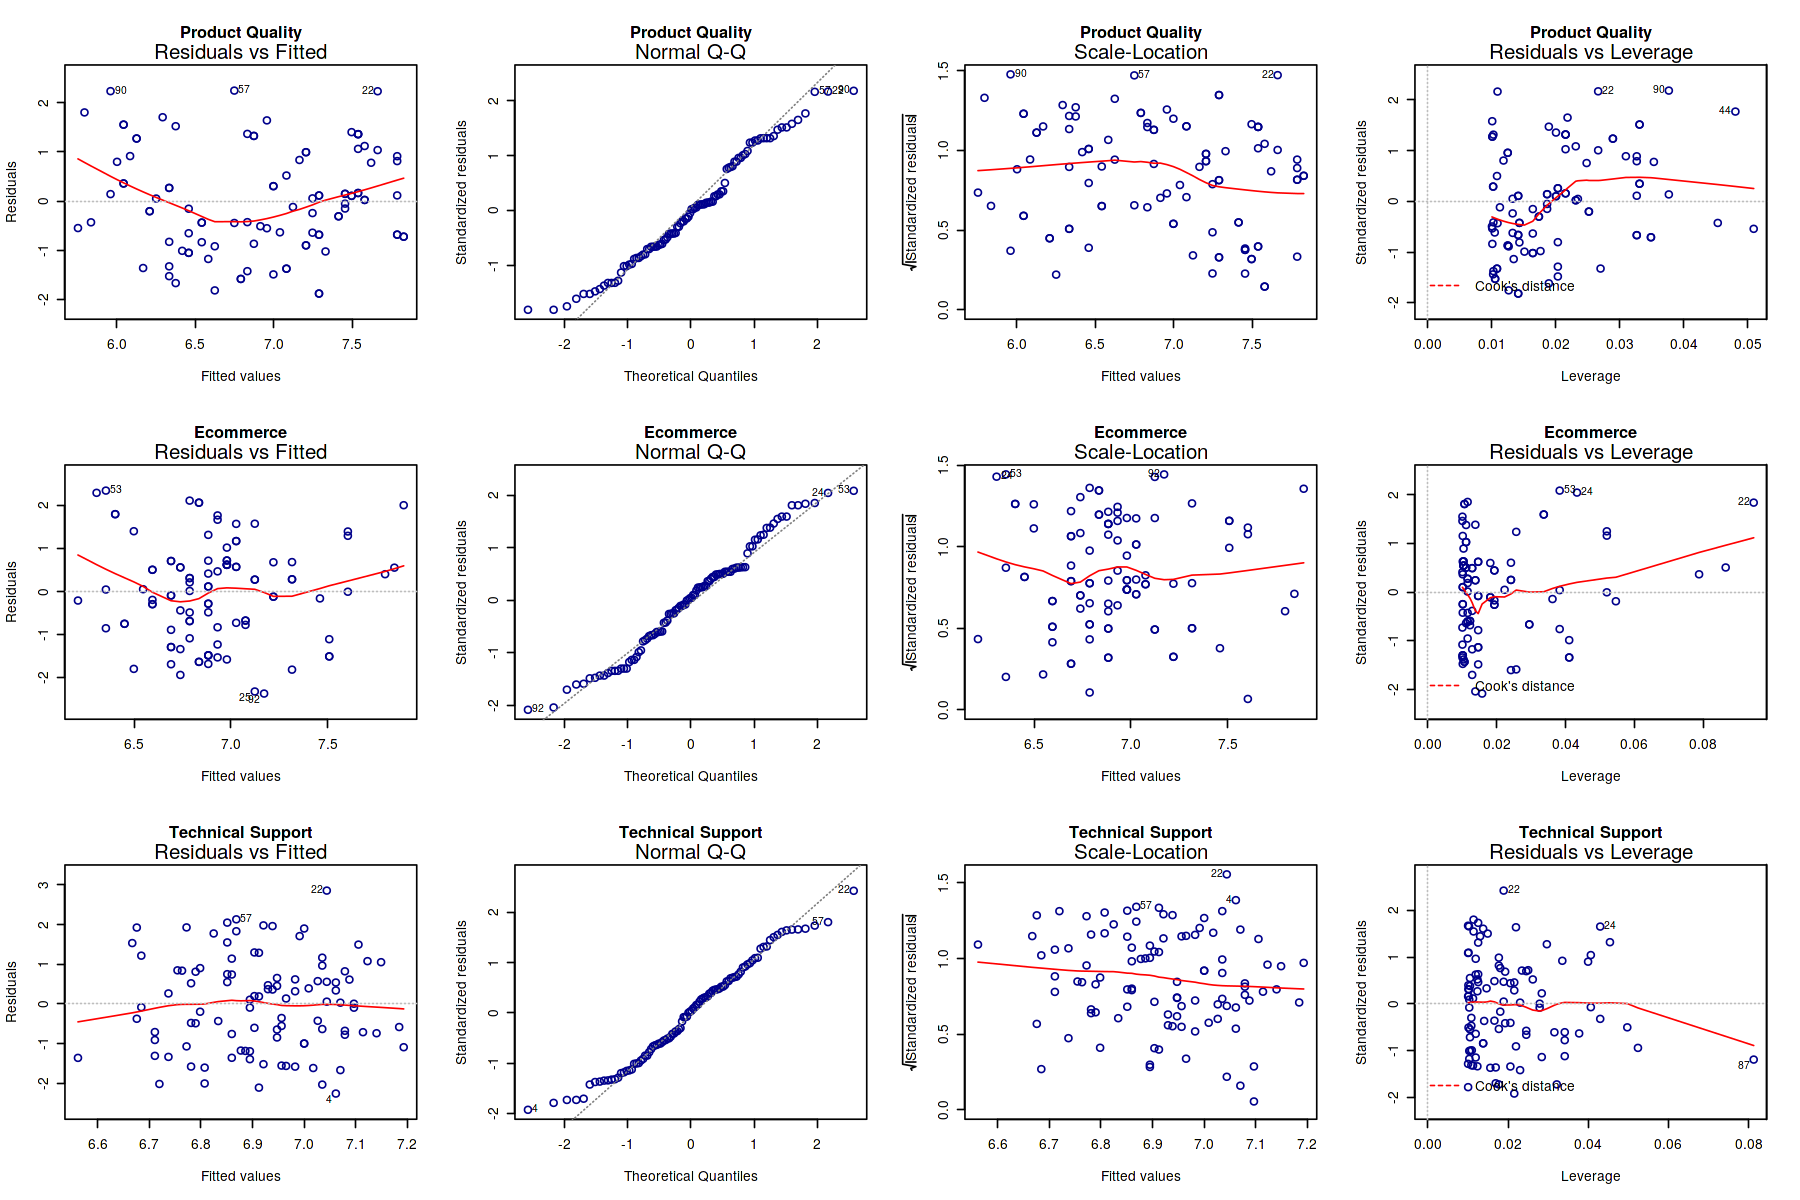

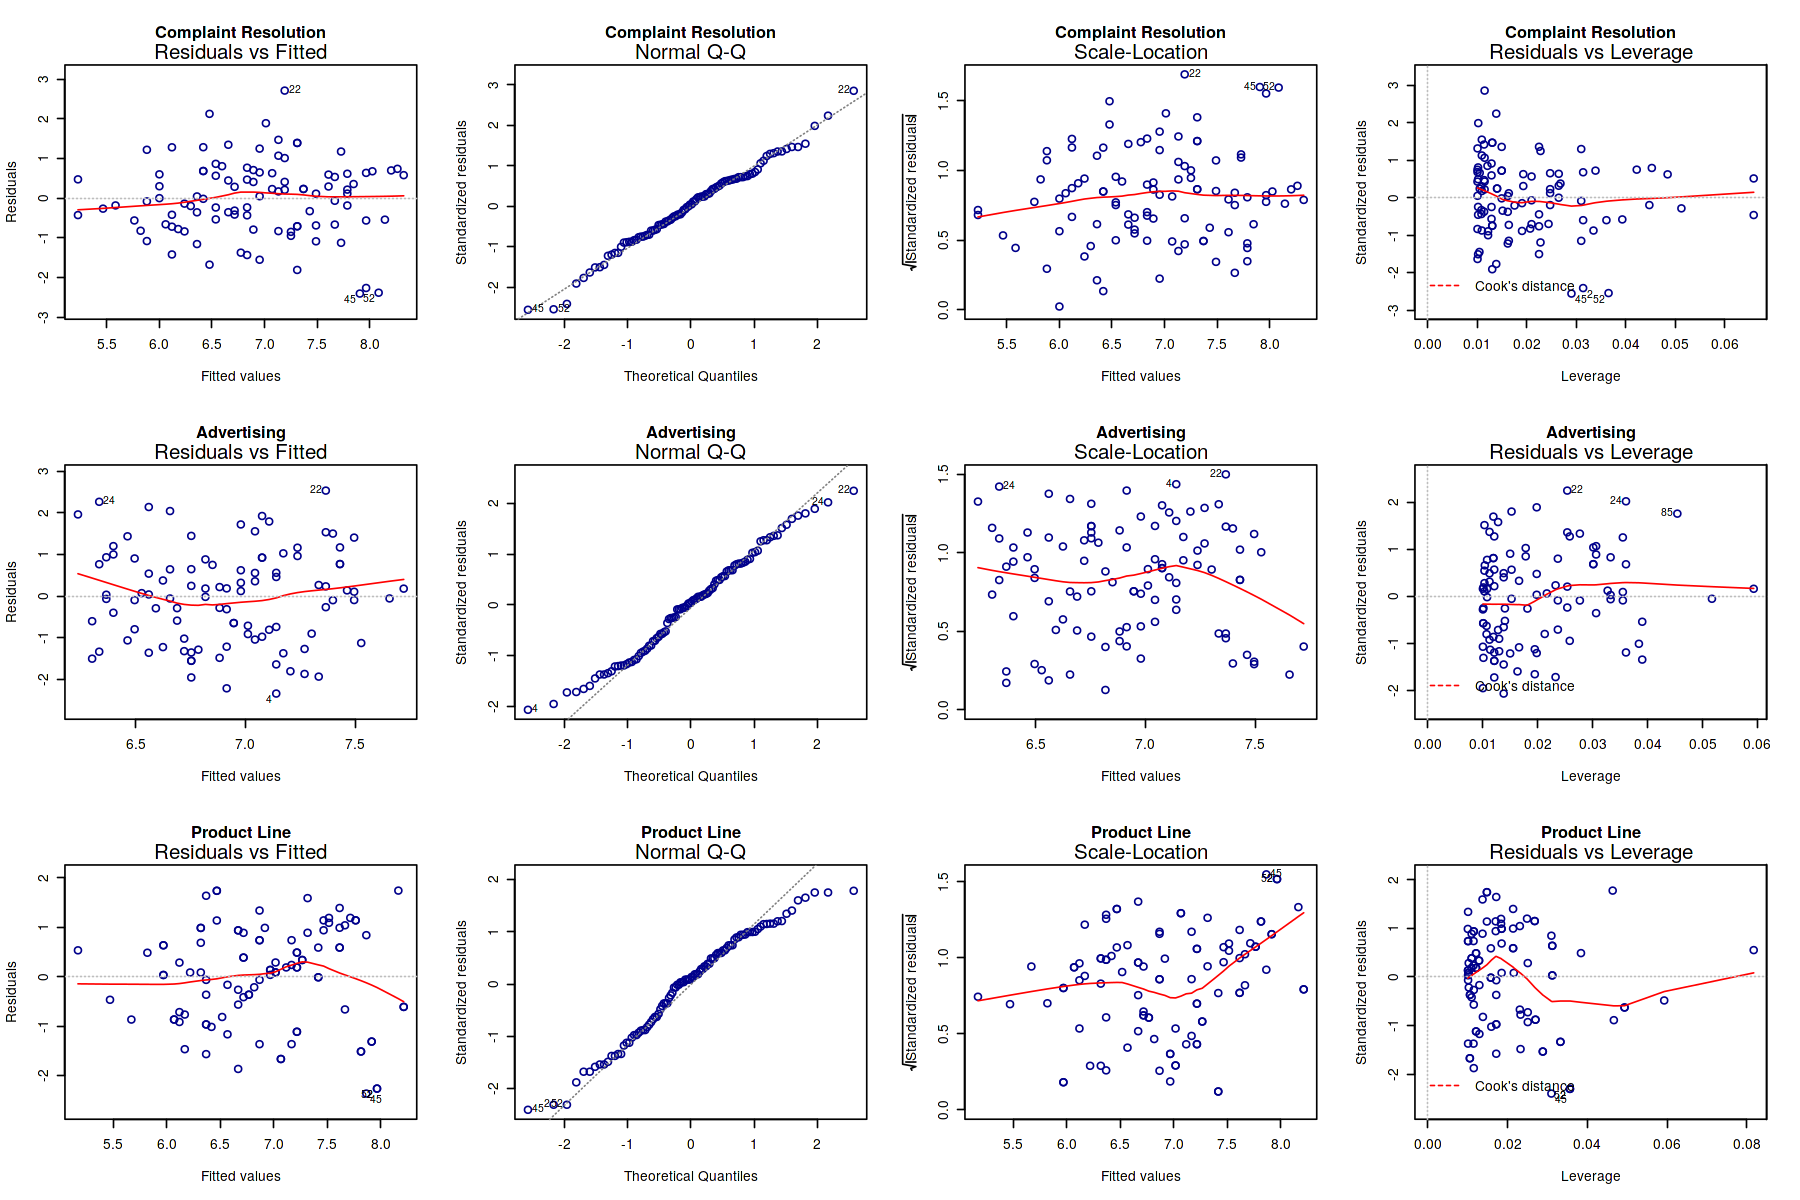

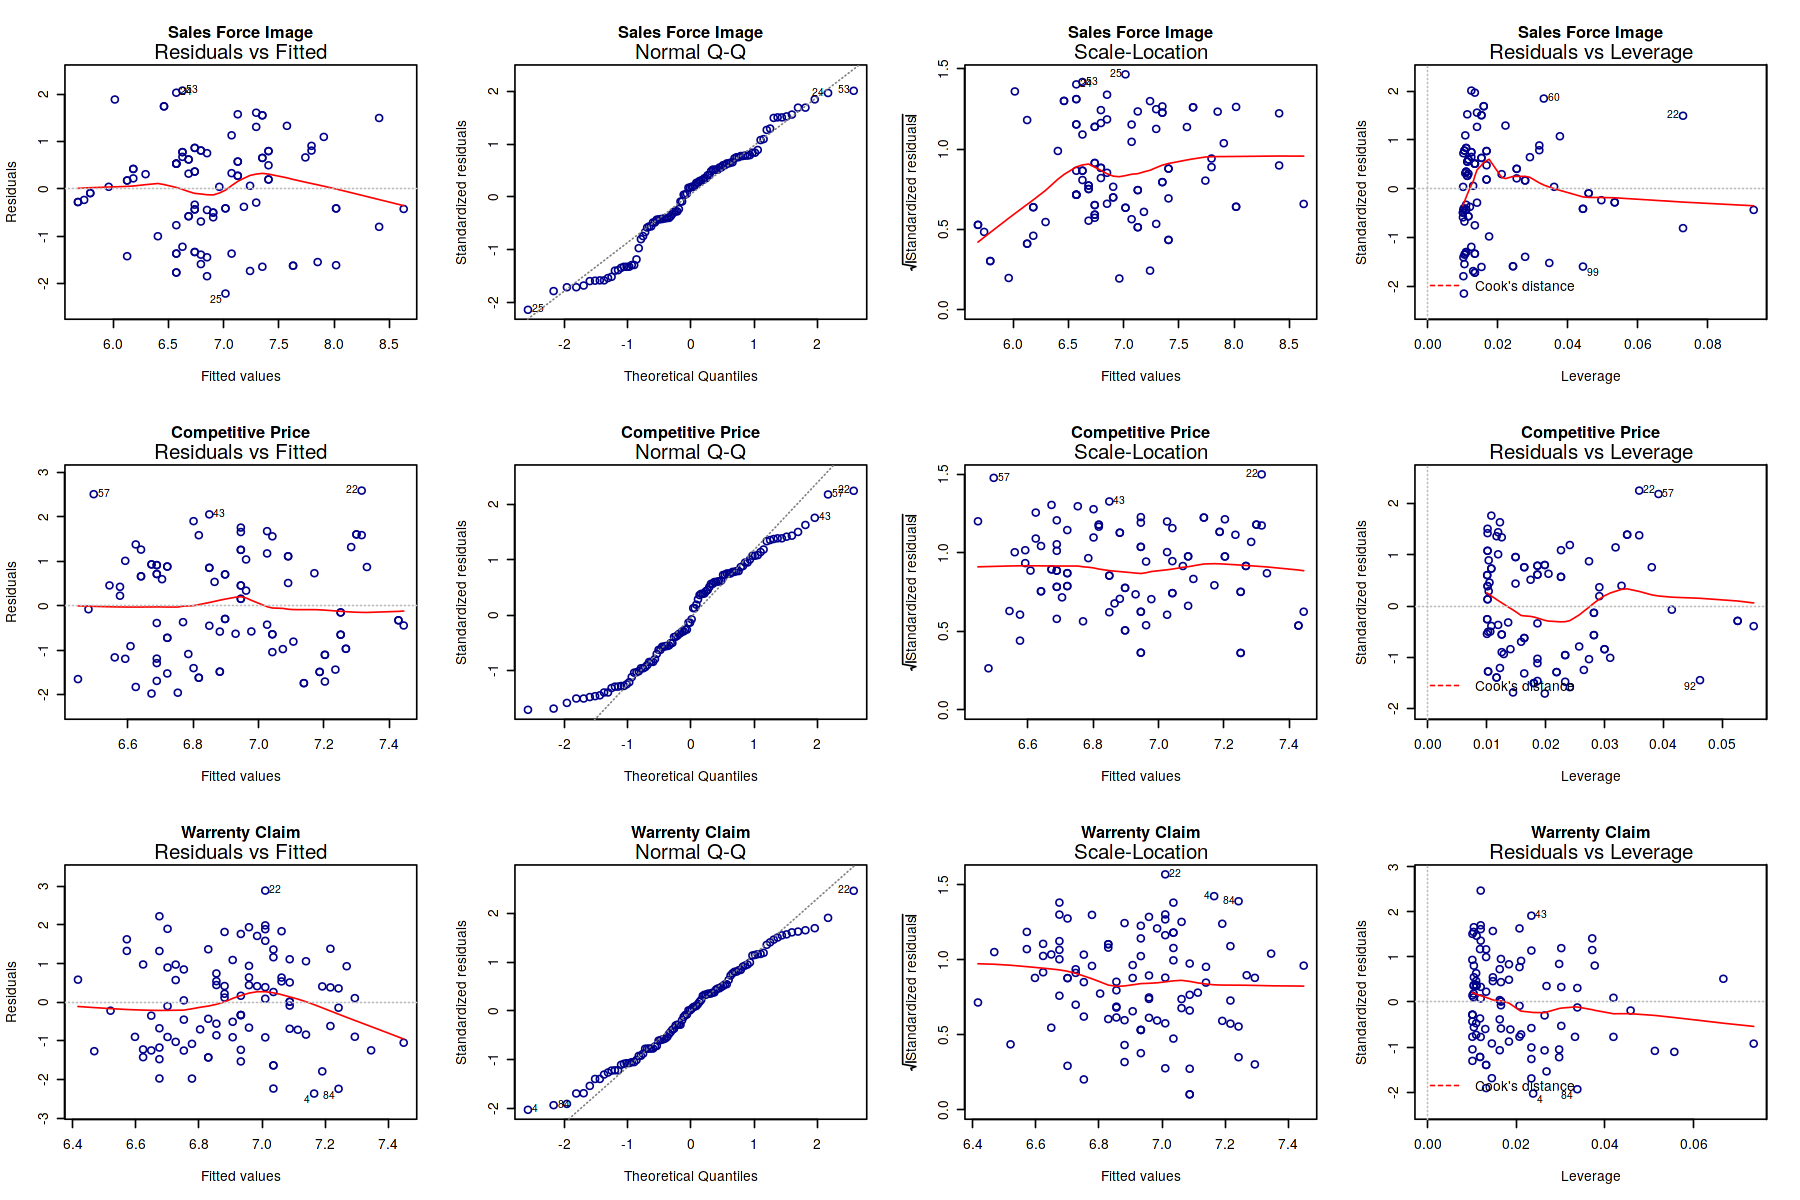

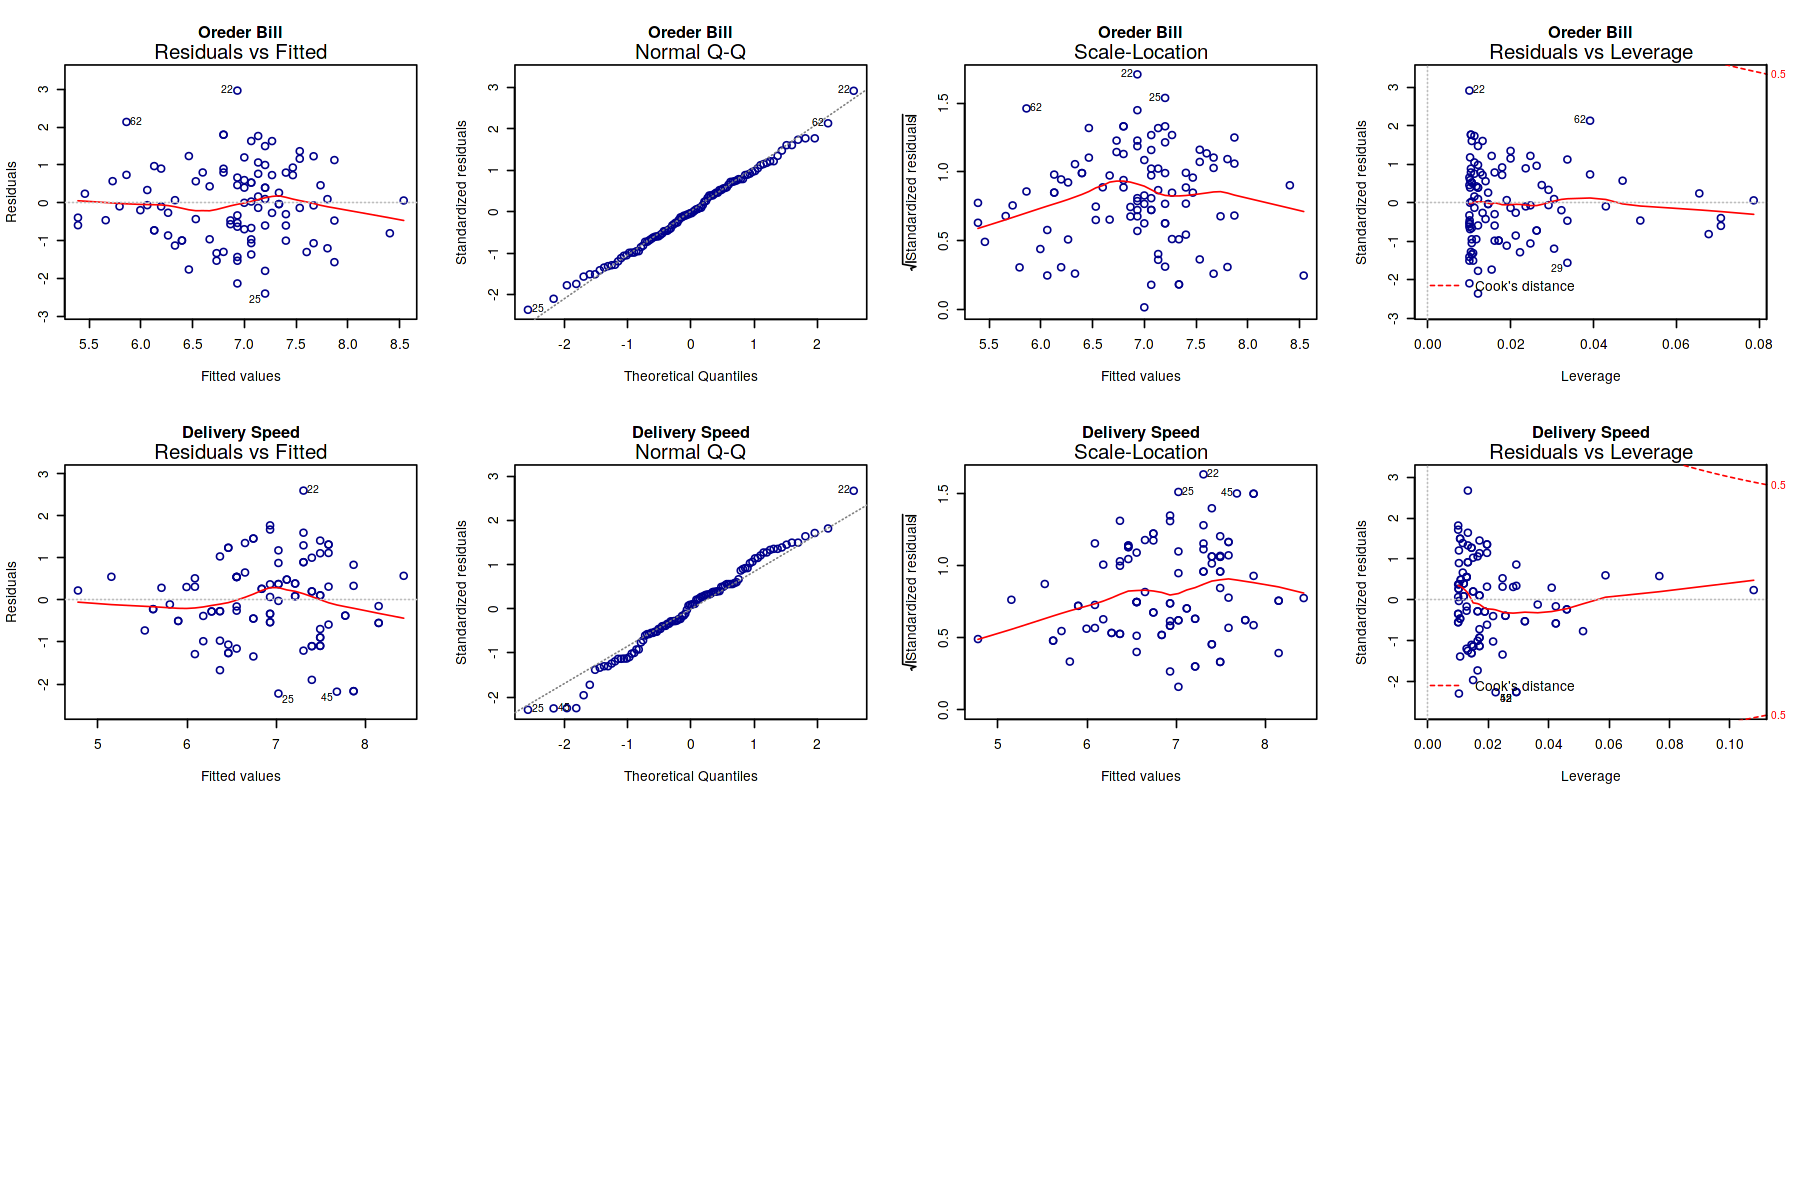

In [9]:
#Plot of Simple linear Regression--------------------------
attach(Data)
par(mfrow=c(3,4))

plot(lm(Satisfaction~ProdQual),col="darkblue",main="Product Quality")
plot(lm(Satisfaction~Ecom),col="darkblue",main="Ecommerce")
plot(lm(Satisfaction~TechSup),col="darkblue",main="Technical Support")
plot(lm(Satisfaction~CompRes),col="darkblue",main="Complaint Resolution")
plot(lm(Satisfaction~Advertising),col="darkblue",main="Advertising")
plot(lm(Satisfaction~ProdLine),col="darkblue",main="Product Line")
plot(lm(Satisfaction~SalesFImage),col="darkblue",main="Sales Force Image")
plot(lm(Satisfaction~ComPricing),col="darkblue",main="Competitive Price")
plot(lm(Satisfaction~WartyClaim),col="darkblue",main="Warrenty Claim")
plot(lm(Satisfaction~OrdBilling),col="darkblue",main="Oreder Bill")
plot(lm(Satisfaction~DelSpeed),col="darkblue",main="Delivery Speed")


In [10]:

# modelling the Response variable against the predictors using linear Regression
Model1 = lm(Satisfaction ~ . , data = Data)
summary(Model1)
Ev=t(data.frame(vif(Model1)))

Ev


Call:
lm(formula = Satisfaction ~ ., data = Data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.43005 -0.31165  0.07621  0.37190  0.90120 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.66961    0.81233  -0.824  0.41199    
ProdQual     0.37137    0.05177   7.173 2.18e-10 ***
Ecom        -0.44056    0.13396  -3.289  0.00145 ** 
TechSup      0.03299    0.06372   0.518  0.60591    
CompRes      0.16703    0.10173   1.642  0.10416    
Advertising -0.02602    0.06161  -0.422  0.67382    
ProdLine     0.14034    0.08025   1.749  0.08384 .  
SalesFImage  0.80611    0.09775   8.247 1.45e-12 ***
ComPricing  -0.03853    0.04677  -0.824  0.41235    
WartyClaim  -0.10298    0.12330  -0.835  0.40587    
OrdBilling   0.14635    0.10367   1.412  0.16160    
DelSpeed     0.16570    0.19644   0.844  0.40124    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5623 on 88 degrees of freedom
Multiple R-squar

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
vif.Model1.,1.635797,2.756694,2.976796,4.730448,1.508933,3.488185,3.43942,1.635,3.198337,2.902999,6.516014


Here, even though independent variables explain 77% of variance of the dependent variable, only 3 variables are significant out of 11 independent variables.
Now let’s study the VIF values.
High Variable Inflation Factor (VIF) is a sign of multicollinearity. There is no formal VIF value for determining presence of multicollinearity; however in weaker models VIF value greater than 2.5 may be a cause of concern.
From the VIF values we can infer that variables DelSpeed and CompRes are a cause of concern.

#### Remedial Measures:
Two of the most commonly used methods to deal with multicollinearity in the model is the following.
* Remove some of the highly correlated variables using VIF or stepwise algorithms.
* Perform an analysis design like principal component analysis (PCA)/ Factor Analysis on the correlated variables.

Warning message:
“`arrange_()` is deprecated as of dplyr 0.7.0.
Please use `arrange()` instead.
See vignette('programming') for more help
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


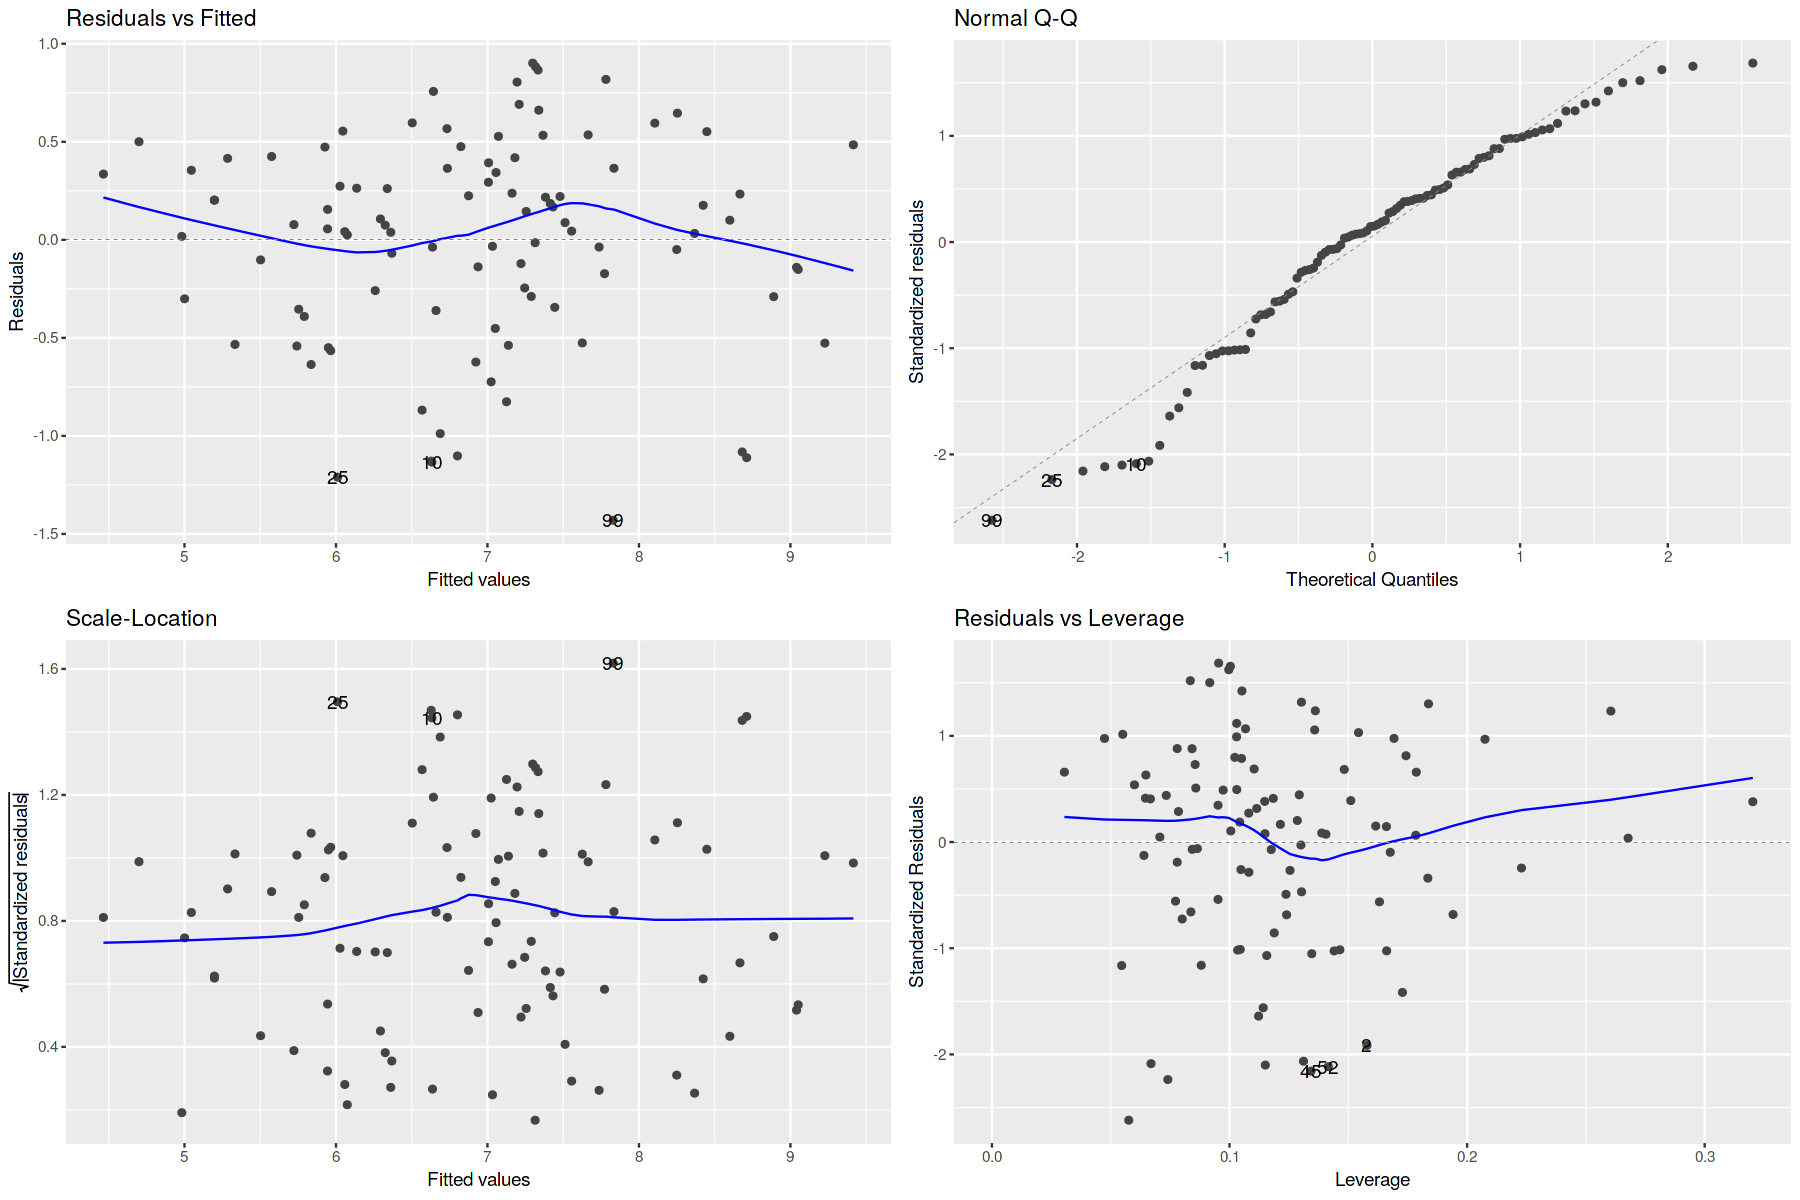

In [11]:
#Plot of Multiple Regression
autoplot(Model1)

Now let’s check the factorability of the variables in the dataset.
First create a new dataset by taking a subset of all the independent variables in the data and perform Kaiser-Meyer-Olkin (KMO) Test

In [12]:

#Checking KMO
data2 <- subset(Data, select = -c(12))
datamatrix<-cor(data2)
KMO(r=datamatrix)

Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = datamatrix)
Overall MSA =  0.65
MSA for each item = 
   ProdQual        Ecom     TechSup     CompRes Advertising    ProdLine 
       0.51        0.63        0.52        0.79        0.78        0.62 
SalesFImage  ComPricing  WartyClaim  OrdBilling    DelSpeed 
       0.62        0.75        0.51        0.76        0.67 

Since MSA > **0.5**, we can run Factor Analysis on this data.

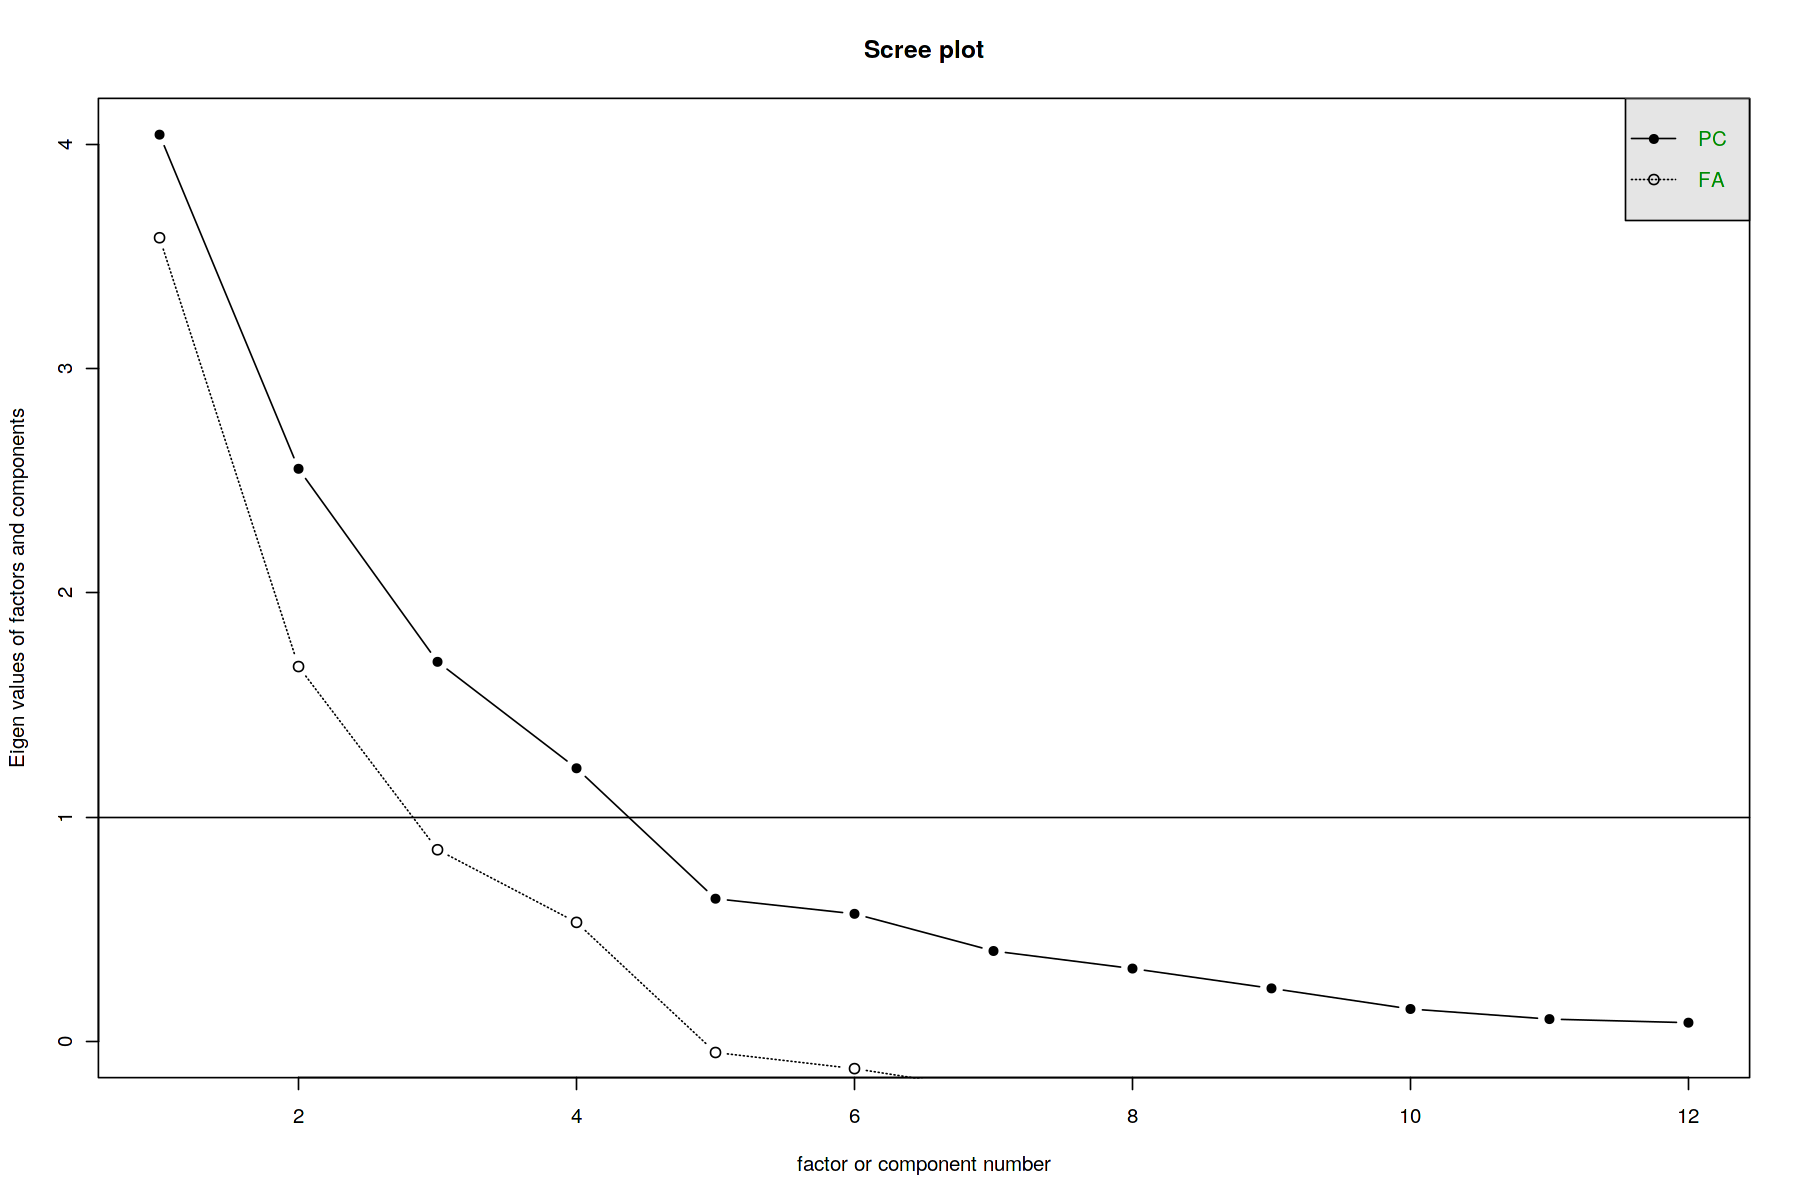

In [13]:
#Ploting factor
scree(Data)

Looking at the plot 3 or 4 factors would be a good choice.

In [14]:
#Eigen Values and Vector
Eigen=eigen(correl)
Eigen$vectors
Eigen$values


-0.1585512,0.313131524,-0.07356137,0.6140708,-0.24964531,0.36499541,0.126407737,-0.326877510,0.18602426,-0.20370330,0.22885317,-0.21787575
-0.1661857,-0.440592609,0.23651951,0.1962824,-0.18886909,-0.46540483,0.008247843,-0.507851971,0.21574952,-0.03718659,-0.02881148,0.35323725
-0.1251433,0.238289845,0.61631236,-0.1794140,-0.03977108,0.12392836,-0.013460766,0.081828178,0.54753081,0.42475155,-0.01766533,-0.10580091
-0.4226334,-0.001341205,-0.19665426,-0.2797050,-0.03340857,0.01495235,-0.004638175,0.149299321,0.43697539,-0.58601845,-0.37853377,-0.05627641
-0.1807615,-0.357245305,0.08986750,0.2060001,0.76107633,0.41890840,-0.071550579,-0.122828960,0.04176506,0.02836138,-0.09687680,0.04824083
-0.3528387,0.297786674,-0.11122737,0.1000883,0.02506070,-0.19582280,-0.633979131,-0.223191343,-0.23246141,0.25391841,-0.34728677,-0.18600871
-0.2179500,-0.464888785,0.24094190,0.1994883,-0.14209236,-0.16711795,0.021650263,0.334109826,-0.17036570,-0.03993494,0.07388433,-0.66500583
0.1348370,-0.417763172,-0.05166670,-0.2407948,-0.48964840,0.58557549,-0.342805280,-0.163387635,-0.02851369,0.08642644,-0.10660117,0.01139137
-0.1749912,0.201184203,0.60545958,-0.1895993,-0.02158615,0.14229590,-0.040119206,-0.107015819,-0.50449856,-0.45392345,0.08277850,0.15868264
-0.3879794,-0.009061557,-0.15503653,-0.3066857,-0.04908379,0.09117472,0.628742239,-0.334983752,-0.25197455,0.32105097,-0.15754746,-0.14716762
-0.4223407,-0.054457370,-0.21799023,-0.2899030,0.06222027,-0.03060577,-0.236927743,-0.001464018,0.07544805,0.05793177,0.78321219,0.06069937


[1] 4.04285997 2.55292440 1.69222417 1.21754639 0.63596293 0.56853132
 [7] 0.40282774 0.32448016 0.23613948 0.14422355 0.09913845 0.08314143

In [15]:

#PCA
data2 <- subset(Data, select = -c(12))
PCA_Un=psych::principal(r=scale(data2),nfactors = 4,rotate="none")
print(PCA_Un)

PCA_rotated=psych::principal(r=scale(data2),nfactors = 4,rotate="varimax")
print(PCA_rotated)

PCA_Data=PCA_rotated$scores
head(PCA_Data)

Principal Components Analysis
Call: psych::principal(r = scale(data2), nfactors = 4, rotate = "none")
Standardized loadings (pattern matrix) based upon correlation matrix
              PC1   PC2   PC3   PC4   h2    u2 com
ProdQual     0.25 -0.50 -0.08  0.67 0.77 0.232 2.2
Ecom         0.31  0.71  0.31  0.28 0.78 0.223 2.1
TechSup      0.29 -0.37  0.79 -0.20 0.89 0.107 1.9
CompRes      0.87  0.03 -0.27 -0.22 0.88 0.119 1.3
Advertising  0.34  0.58  0.11  0.33 0.58 0.424 2.4
ProdLine     0.72 -0.45 -0.15  0.21 0.79 0.213 2.0
SalesFImage  0.38  0.75  0.31  0.23 0.86 0.141 2.1
ComPricing  -0.28  0.66 -0.07 -0.35 0.64 0.359 1.9
WartyClaim   0.39 -0.31  0.78 -0.19 0.89 0.108 2.0
OrdBilling   0.81  0.04 -0.22 -0.25 0.77 0.234 1.3
DelSpeed     0.88  0.12 -0.30 -0.21 0.91 0.086 1.4

                       PC1  PC2  PC3  PC4
SS loadings           3.43 2.55 1.69 1.09
Proportion Var        0.31 0.23 0.15 0.10
Cumulative Var        0.31 0.54 0.70 0.80
Proportion Explained  0.39 0.29 0.19 0.12
Cumula

,RC1,RC2,RC3,RC4
1,0.1274910,0.7698686,-1.878446273,0.3664848
2,1.2216666,-1.6458617,-0.614030010,0.8130648
3,0.6158214,0.5800037,0.003689252,1.5699769
4,-0.8446267,-0.2719218,1.267493254,-1.2541645
5,-0.3197943,-0.8340650,-0.008096627,0.4475377
6,-0.6470292,-1.0672683,-1.303198892,-1.0527792


Let’s use orthogonal rotation (varimax) because in orthogonal rotation the rotated factors will remain uncorrelated whereas in oblique rotation the resulting factors will be correlated.


Parallel analysis suggests that the number of factors =  4  and the number of components =  NA 


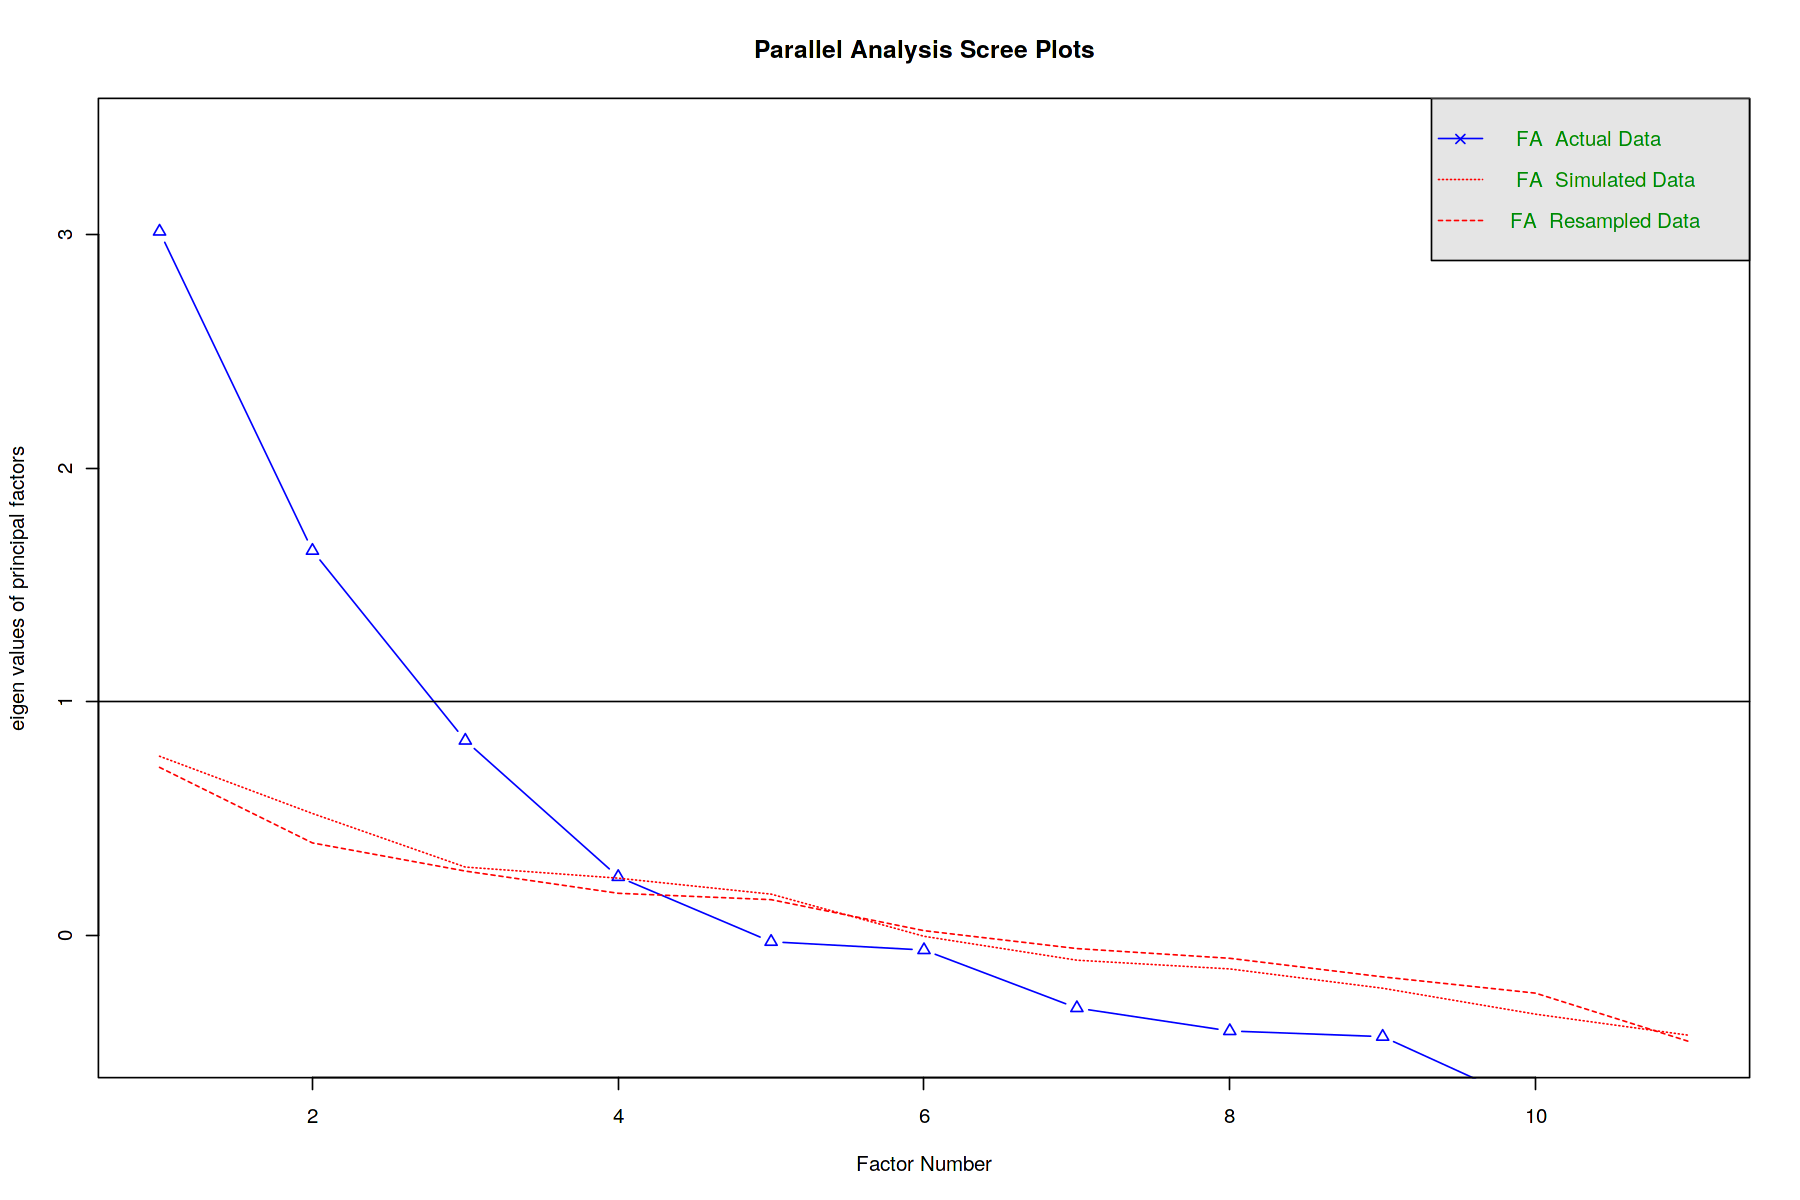

In [16]:
#FA
parallel <- fa.parallel(data2, fm = 'minres', fa = 'fa',n.iter=1)

fa1<- fa(r=data2, nfactors = 4, rotate="varimax",fm="pa")



The blue line shows eigenvalues of actual data and the two red lines (placed on top of each other) show simulated and resampled data. Here we look at the large drops in the actual data and spot the point where it levels off to the right.



Factor Analysis using method =  pa
Call: fa(r = data2, nfactors = 4, rotate = "varimax", fm = "pa")
Standardized loadings (pattern matrix) based upon correlation matrix
              PA1   PA2   PA3   PA4   h2    u2 com
ProdQual     0.02 -0.07  0.02  0.65 0.42 0.576 1.0
Ecom         0.07  0.79  0.03 -0.11 0.64 0.362 1.1
TechSup      0.02 -0.03  0.88  0.12 0.79 0.205 1.0
CompRes      0.90  0.13  0.05  0.13 0.84 0.157 1.1
Advertising  0.17  0.53 -0.04 -0.06 0.31 0.686 1.2
ProdLine     0.53 -0.04  0.13  0.71 0.80 0.200 1.9
SalesFImage  0.12  0.97  0.06 -0.13 0.98 0.021 1.1
ComPricing  -0.08  0.21 -0.21 -0.59 0.44 0.557 1.6
WartyClaim   0.10  0.06  0.89  0.13 0.81 0.186 1.1
OrdBilling   0.77  0.13  0.09  0.09 0.62 0.378 1.1
DelSpeed     0.95  0.19  0.00  0.09 0.94 0.058 1.1

                       PA1  PA2  PA3  PA4
SS loadings           2.63 1.97 1.64 1.37
Proportion Var        0.24 0.18 0.15 0.12
Cumulative Var        0.24 0.42 0.57 0.69
Proportion Explained  0.35 0.26 0.22 0.18
Cumulati

,Satisfaction,PA1,PA2,PA3,PA4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,8.2,-0.1338871,0.9175166,-1.719604873,0.09135411
2,5.7,1.6297604,-2.0090053,-0.596361722,0.65808192
3,8.9,0.3637658,0.8361736,0.002979966,1.37548765
4,4.8,-1.2225230,-0.5491336,1.245473305,-0.64421384
5,7.1,-0.4854209,-0.4276223,-0.026980304,0.47360747
6,4.7,-0.5950924,-1.3035333,-1.183019401,-0.95913571


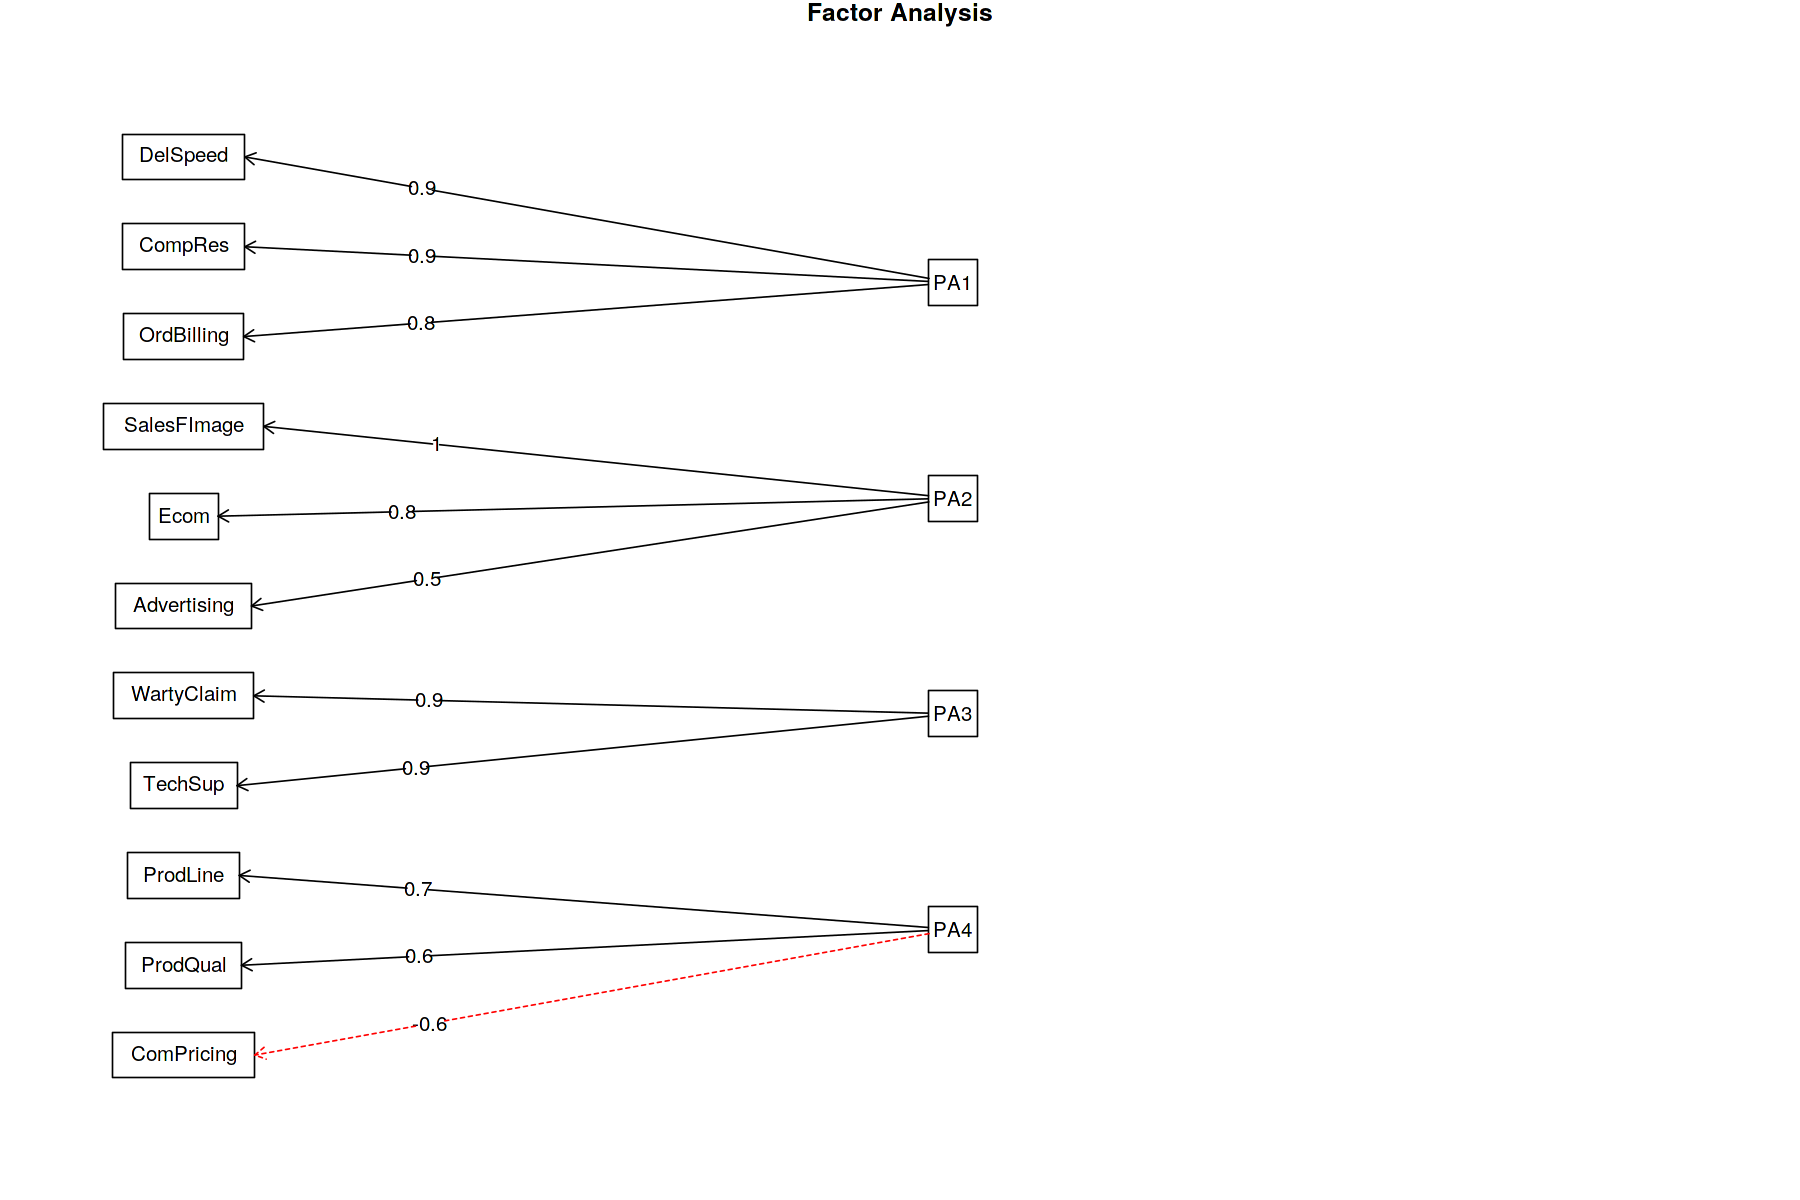

In [17]:
print(fa1)
fa.diagram(fa1)

regdata <- cbind(Data[12], fa1$scores)

head(regdata)

#### Labelling and interpretation of the factors
	

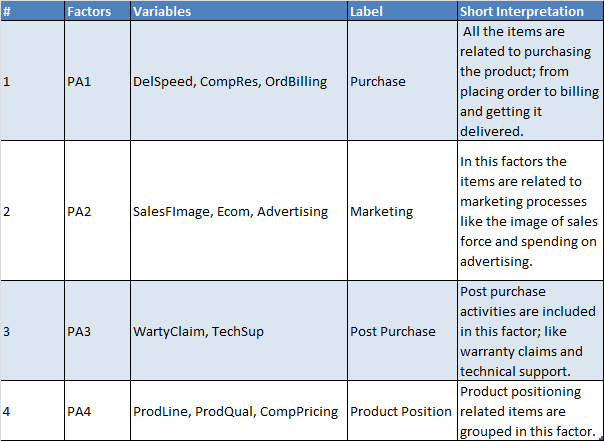

In [18]:
#Factor loadings
colnames(regdata) <- c("Satisfaction", "Purchanse", "Marketing", "Post_purchase", "Prod_positioning")
regdata=data.frame(regdata)
regdata

,Satisfaction,Purchanse,Marketing,Post_purchase,Prod_positioning
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,8.2,-0.13388710,0.91751661,-1.719604873,0.09135411
2,5.7,1.62976040,-2.00900531,-0.596361722,0.65808192
3,8.9,0.36376581,0.83617362,0.002979966,1.37548765
4,4.8,-1.22252302,-0.54913358,1.245473305,-0.64421384
5,7.1,-0.48542093,-0.42762231,-0.026980304,0.47360747
6,4.7,-0.59509240,-1.30353334,-1.183019401,-0.95913571
7,5.7,-2.52885363,0.38836877,-0.603275803,-1.29659025
8,6.3,-0.11315168,-0.13097631,-0.699238481,-1.36606005
9,7.0,0.95751096,0.34755882,-0.142256076,-0.93477420


In [19]:
#Regression with factors created
Hair_Data=lm(Satisfaction~.,data = regdata)
summary(Hair_Data)


Call:
lm(formula = Satisfaction ~ ., data = regdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7125 -0.4708  0.1024  0.4158  1.3483 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       6.91800    0.06696 103.317  < 2e-16 ***
Purchanse         0.57963    0.06857   8.453 3.32e-13 ***
Marketing         0.61978    0.06834   9.070 1.61e-14 ***
Post_purchase     0.05692    0.07173   0.794    0.429    
Prod_positioning  0.61168    0.07656   7.990 3.16e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6696 on 95 degrees of freedom
Multiple R-squared:  0.6971,	Adjusted R-squared:  0.6844 
F-statistic: 54.66 on 4 and 95 DF,  p-value: < 2.2e-16


As we could see through p value that the model is very significant and other than Post purchase variable other all variable are significant

#### Conclusion

The factors Sales, Marketing and Quality assurance are highly significant especially quality assurance and After sales service is not significant in this model. The combined factors such as Purchase ,Marketing and Product positioning plays a large role in increase in Sales.